_quiero agradecer a gpt por los comentarios :)_

In [25]:
import pandas as pd 
import numpy as np
import unicodedata
from typing import List, Optional, Dict, Any, Iterable
import matplotlib.pyplot as plt
from datetime import datetime
import re

In [26]:
# -----------------------------------------
# Path's, filenames and constants
# -----------------------------------------

path = './data'
filenameUTB = 'Base de datos Scopus.xlsx'
filenameScopus = 'scopus-2.csv'
filenameScimago = 'scimagojr2024.csv'
YEAR = datetime.now().year

In [27]:
# -----------------------------------------
# Upload UTB Researchers data 
# -----------------------------------------

dataUTB = pd.read_excel(f'{path}/{filenameUTB}')
dataUTB = dataUTB.rename(columns = {'ID SCOPUS': "Autor ID"})
dataUTB["Autor ID"] = dataUTB["Autor ID"].astype(str)

In [28]:
# -----------------------------------------
# Generate Query for Scopus API
# -----------------------------------------

def generate_query(code: str, id: str):
    """
    Builds a query string by combining a search code and its value.

    The output follows the typical format used in structured queries,
    where the code is followed by the value enclosed in parentheses.

    Args:
        code (str): The search field or reference key.
        id (str): The numeric or alphanumeric value linked to the code.

    Returns:
        str: A query string ready to be used in a search request.
    """
    query = [f'{code} ( {_} )' for _ in id]
    return ' OR '.join(query)

query = generate_query('AU-ID', dataUTB["Autor ID"].tolist())
print(query)

AU-ID ( 57156565000 ) OR AU-ID ( 14622047600 ) OR AU-ID ( 24329839300 ) OR AU-ID ( 57194034904 ) OR AU-ID ( 57193533853 ) OR AU-ID ( 24537991200 ) OR AU-ID ( 36142156300 ) OR AU-ID ( 57039103600 ) OR AU-ID ( 56674579200 ) OR AU-ID ( 57210822856 ) OR AU-ID ( 57191333650 ) OR AU-ID ( 7005142049 ) OR AU-ID ( 57193012270 ) OR AU-ID ( 55649334800 ) OR AU-ID ( 26325154200 ) OR AU-ID ( 55872162200 ) OR AU-ID ( 35788581800 ) OR AU-ID ( 57024211000 ) OR AU-ID ( 56801043600 ) OR AU-ID ( 56380539800 ) OR AU-ID ( 57188841051 ) OR AU-ID ( 57202285682 ) OR AU-ID ( 57350116000 ) OR AU-ID ( 58525252300 ) OR AU-ID ( 57192930752 ) OR AU-ID ( 57200615582 ) OR AU-ID ( 58660078000 ) OR AU-ID ( 57190688459 ) OR AU-ID ( 57208719994 ) OR AU-ID ( 55258973100 ) OR AU-ID ( 57203321995 ) OR AU-ID ( 57220927199 ) OR AU-ID ( 57193252278 ) OR AU-ID ( 57322375300 ) OR AU-ID ( 57205400052 ) OR AU-ID ( 57758796500 ) OR AU-ID ( 56581610900 ) OR AU-ID ( 57392556500 ) OR AU-ID ( 56682785300 ) OR AU-ID ( 57219403758 ) OR A

## __Copiar y pegar — Búsqueda completa en Scopus (Advanced Search)__

1. Abre **Advanced Search** en Scopus: <https://www.scopus.com/search/form.uri?display=advanced>  
2. Copia y pega **tal cual** el bloque de consulta de abajo.  
3. Ejecuta la búsqueda.

---

### __Consulta base__

Incluye el **AF-ID** de la institución y todos los **AU-ID** de los autores asociados.  
Recuerda mantener los paréntesis y los operadores lógicos en mayúscula.

```text
(
  AF-ID ( 60103889 )
  OR AU-ID ( 57156565000 ) OR AU-ID ( 14622047600 ) OR AU-ID ( 24329839300 ) OR AU-ID ( 57194034904 ) OR AU-ID ( 57193533853 ) OR AU-ID ( 24537991200 ) OR AU-ID ( 36142156300 ) OR AU-ID ( 57039103600 ) OR AU-ID ( 56674579200 ) OR AU-ID ( 57210822856 ) OR AU-ID ( 57191333650 ) OR AU-ID ( 7005142049 ) OR AU-ID ( 57193012270 ) OR AU-ID ( 55649334800 ) OR AU-ID ( 26325154200 ) OR AU-ID ( 55872162200 ) OR AU-ID ( 35788581800 ) OR AU-ID ( 57024211000 ) OR AU-ID ( 56801043600 ) OR AU-ID ( 56380539800 ) OR AU-ID ( 57188841051 ) OR AU-ID ( 57202285682 ) OR AU-ID ( 57350116000 ) OR AU-ID ( 58525252300 ) OR AU-ID ( 57192930752 ) OR AU-ID ( 57200615582 ) OR AU-ID ( 58660078000 ) OR AU-ID ( 57190688459 ) OR AU-ID ( 57208719994 ) OR AU-ID ( 55258973100 ) OR AU-ID ( 57203321995 ) OR AU-ID ( 57220927199 ) OR AU-ID ( 57193252278 ) OR AU-ID ( 57322375300 ) OR AU-ID ( 57205400052 ) OR AU-ID ( 57758796500 ) OR AU-ID ( 56581610900 ) OR AU-ID ( 57392556500 ) OR AU-ID ( 56682785300 ) OR AU-ID ( 57219403758 ) OR AU-ID ( 57197327858 ) OR AU-ID ( 57196040759 ) OR AU-ID ( 57220077867 ) OR AU-ID ( 57750422100 ) OR AU-ID ( 57223851529 ) OR AU-ID ( 57189892062 ) OR AU-ID ( 57205658483 ) OR AU-ID ( 58068307100 ) OR AU-ID ( 57197807415 ) OR AU-ID ( 57918628600 ) OR AU-ID ( 57222278899 ) OR AU-ID ( 7195913974 ) OR AU-ID ( 57218294431 ) OR AU-ID ( 57206773929 ) OR AU-ID ( 58068069000 ) OR AU-ID ( 57216868622 ) OR AU-ID ( 57930663300 ) OR AU-ID ( 58523557700 ) OR AU-ID ( 57204842254 ) OR AU-ID ( 58618811100 ) OR AU-ID ( 57201036449 ) OR AU-ID ( 57209248085 ) OR AU-ID ( 57212006168 ) OR AU-ID ( 57427876200 ) OR AU-ID ( 57204847841 ) OR AU-ID ( 57195913859 ) OR AU-ID ( 57218297655 ) OR AU-ID ( 57222223605 ) OR AU-ID ( 57221229836 ) OR AU-ID ( 58803522300 ) OR AU-ID ( 55783129400 ) OR AU-ID ( 57903699900 ) OR AU-ID ( 58954857900 ) OR AU-ID ( 57202159706 ) OR AU-ID ( 57219626251 ) OR AU-ID ( 57215557867 ) OR AU-ID ( 57219506381 ) OR AU-ID ( 58134344400 ) OR AU-ID ( 58917134900 ) OR AU-ID ( 58153979500 ) OR AU-ID ( 58868256900 ) OR AU-ID ( 57918232800 ) OR AU-ID ( 59987226300 )
)
```


In [29]:
# -----------------------------------------
# Upload Scopus Publications data
# -----------------------------------------

dataScopus = pd.read_csv(f'{path}/{filenameScopus}')
dataScopus

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,Page count,Cited by,DOI,Link,Document Type,Publication Stage,Open Access,Source,EID
0,Herrera-Acevedo D.D.; Sierra-Porta D.,"Herrera-Acevedo, D.D. (59278790000); Sierra-Po...",59278790000; 57191333650,Network structure and urban mobility sustainab...,2025,Sustainable Cities and Society,119,NaN,106076,NaN,NaN,NaN,3,10.1016/j.scs.2024.106076,https://www.scopus.com/inward/record.uri?eid=2...,Article,Final,NaN,Scopus,2-s2.0-85213079490
1,Geney E.R.; Vázquez-Miraz P.,"Geney, Elías Rafael (57427876200); Vázquez-Mir...",57427876200; 57196040759,Interpersonal values associated with unfaithfu...,2025,Revista de Psicologia (Peru),43,1,NaN,438,459,21.0,0,10.18800/psico.202501.015,https://www.scopus.com/inward/record.uri?eid=2...,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85212831235
2,Medina-Reyes M.F.; Fajardo-Cuadro J.G.; Martín...,"Medina-Reyes, María Fernanda (57221229836); Fa...",57221229836; 56581610900; 26325154200,DRIVING THE DEVELOPMENT OF ENERGY COMMUNITIES ...,2025,Habitat Sustentable,15,1,NaN,10,19,9.0,0,10.22320/07190700.2025.15.01.01,https://www.scopus.com/inward/record.uri?eid=2...,Article,Final,NaN,Scopus,2-s2.0-105010266217
3,Pérez-Morón J.M.; García Alonso R.; Thoene U.,"Pérez-Morón, James Manuel (57322375300); Garcí...",57322375300; 57215572817; 56766193900,Looking back to move forward: shedding light o...,2024,New England Journal of Entrepreneurship,27,2,NaN,152,172,20.0,7,10.1108/NEJE-10-2023-0088,https://www.scopus.com/inward/record.uri?eid=2...,Review,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85201694426
4,Hernandez-Fernandez J.; Herrera Zabala J.E.; M...,"Hernandez-Fernandez, Joaquin (57210432772); He...",57210432772; 59387631800; 36800050600,"Applied Investigation of Methyl, Ethyl, Propyl...",2024,Polymers,16,20,2851,NaN,NaN,NaN,2,10.3390/polym16202851,https://www.scopus.com/inward/record.uri?eid=2...,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85207660911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,Ortiz O.O.; Pasqualino J.; Castells F.,"Ortiz, O.O. (24436854200); Pasqualino, J. (146...",24436854200; 14622047600; 7003612213,Environmental assessment based on life cycle a...,2010,Afinidad,67,547,NaN,175,181,6.0,1,NaN,https://www.scopus.com/inward/record.uri?eid=2...,Article,Final,NaN,Scopus,2-s2.0-79953715946
1684,Romero L.A.; Millán M.S.; Pérez-Cabré E.,"Romero, Lenny A. (36142156300); Millán, María ...",36142156300; 7201466399; 8729551400,Optical implementation of multifocal programma...,2011,Journal of Physics: Conference Series,274,1,012050,NaN,NaN,NaN,4,10.1088/1742-6596/274/1/012050,https://www.scopus.com/inward/record.uri?eid=2...,Conference paper,Final,All Open Access; Gold Open Access; Green Open ...,Scopus,2-s2.0-79953739933
1685,Villa J.L.; Duque M.; Gauthier A.; Rakoto-Rava...,"Villa, J.L. (7005142049); Duque, M. (700486442...",7005142049; 7004864427; 7102084702; 6603389671,Supervision and optimal control of a class of ...,2003,IEEE International Conference on Emerging Tech...,2,January,1248693,177,180,3.0,5,10.1109/ETFA.2003.1248693,https://www.scopus.com/inward/record.uri?eid=2...,Conference paper,Final,NaN,Scopus,2-s2.0-79961012788
1686,Marrugo A.G.; Millán M.S.,"Marrugo, Andrés G. (24329839300); Millán, Marí...",24329839300; 7201466399,Optic disc segmentation in retinal images; [Se...,2010,Optica Pura y Aplicada,43,2,NaN,79,86,7.0,4,NaN,https://www.scopus.com/inward/record.uri?eid=2...,Article,Final,NaN,Scopus,2-s2.0-77954168286


In [30]:
# -----------------------------------------
# Upload Scimago Journal & Country Rank data
# -----------------------------------------

dataScimago = pd.read_csv(f'{path}/{filenameScimago}', delimiter=';')
dataScimago

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2024),Total Docs. (3years),...,Ref. / Doc.,%Female,Overton,SDG,Country,Region,Publisher,Coverage,Categories,Areas
0,1,28773,Ca-A Cancer Journal for Clinicians,journal,"15424863, 00079235","145,004",Q1,223,43,122,...,"62,88",-,4,37,United States,Northern America,John Wiley and Sons Inc,1950-2025,Hematology (Q1); Oncology (Q1),Medicine
1,2,19434,MMWR Recommendations and Reports,journal,"10575987, 15458601","41,754",Q1,155,6,15,...,"275,33",-,1,5,United States,Northern America,Centers for Disease Control and Prevention (CDC),1990-2024,Epidemiology (Q1); Health Information Manageme...,Environmental Science; Health Professions; Med...
2,3,20315,Nature Reviews Molecular Cell Biology,journal,"14710072, 14710080","37,353",Q1,531,125,337,...,"92,45",-,0,15,United Kingdom,Western Europe,Nature Research,2000-2025,Cell Biology (Q1); Molecular Biology (Q1),"Biochemistry, Genetics and Molecular Biology"
3,4,29431,Quarterly Journal of Economics,journal,"00335533, 15314650","35,995",Q1,322,48,143,...,"69,79",-,35,27,United Kingdom,Western Europe,Oxford University Press,1886-2025,Economics and Econometrics (Q1),"Economics, Econometrics and Finance"
4,5,20425,Nature Reviews Drug Discovery,journal,"14741784, 14741776","30,506",Q1,412,247,718,...,"35,66",-,1,58,United Kingdom,Western Europe,Nature Research,2002-2025,Drug Discovery (Q1); Medicine (miscellaneous) ...,"Medicine; Pharmacology, Toxicology and Pharmac..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31131,31132,145515,Waves in Random and Complex Media (discontinued),journal,"17455049, 17455030",NaN,-,54,308,1068,...,"49,05",-,0,20,United Kingdom,Western Europe,Taylor and Francis Ltd.,2005-2024,Engineering (miscellaneous); Physics and Astro...,Engineering; Physics and Astronomy
31132,31133,21101174249,Word and Music Studies,book series,15660958,NaN,-,8,16,21,...,"79,44",-,0,0,Netherlands,Western Europe,Brill: Rodopi,"1999-2001, 2004-2006, 2008, 2010-2011, 2014-20...",Arts and Humanities (miscellaneous); Literatur...,Arts and Humanities
31133,31134,18033,"World Dredging, Mining and Construction",trade journal,10450343,NaN,-,3,2,32,...,"0,00",-,0,1,United States,Northern America,Placer Management Corp.,"1979, 1988-2024",Building and Construction; Ocean Engineering; ...,Earth and Planetary Sciences; Engineering
31134,31135,21100898632,World Scientific-Now Publishers Series in Busi...,book series,22513442,NaN,-,3,9,22,...,"31,33",-,0,0,Singapore,Asiatic Region,World Scientific,"2018-2020, 2023-2024","Business, Management and Accounting (miscellan...","Business, Management and Accounting"


In [31]:
def norm_col(s: pd.Series) -> pd.Series:
    """
    Normalize a text column for robust joining/matching.

    The transformation applies:
    1) Cast to string.
    2) Remove diacritics (NFKD → ASCII).
    3) Lowercase, collapse internal whitespace, and strip ends.
    4) Harmonize common symbols: '&' → 'and', various dashes → '-'.

    Parameters
    ----------
    s : pandas.Series
        Input series with text values (e.g., journal titles).

    Returns
    -------
    pandas.Series
        Normalized text suitable to be used as a join key.

    Examples
    --------
    >>> import pandas as pd
    >>> norm_col(pd.Series([' Energy & Power — Journal  ']))[0]
    'energy and power - journal'
    """
    # Ensure all values are strings (prevents issues with NaN, numbers, etc.).
    s = s.astype(str)

    # Remove diacritics by decomposing Unicode (NFKD) and dropping non-ASCII
    # marks. Example: "Información" → "Informacion".
    s = s.apply(
        lambda x: unicodedata.normalize("NFKD", x)
        .encode("ascii", "ignore")
        .decode("ascii")
    )

    # Normalize casing and spacing:
    # - lowercase all characters
    # - collapse any run of whitespace into a single space
    # - trim leading/trailing spaces
    s = (
        s.str.lower()
         .str.replace(r"\s+", " ", regex=True)
         .str.strip()
    )

    # Harmonize frequently inconsistent symbols across sources:
    # - replace '&' with the word 'and'
    # - standardize different dash characters to a simple hyphen
    s = (
        s.str.replace("&", "and")
         .str.replace(r"[-–—]", "-", regex=True)
    )

    return s

In [32]:
# -----------------------------------------
# Merge Scopus and Scimago data → only add SJR Best Quartile to Scopus records
# -----------------------------------------

# Copiamos los df para no modificar los originales
scopus = dataScopus.copy()
scimago = dataScimago.copy()

# Claves normalizadas
scopus['__key'] = norm_col(scopus['Source title'])
scimago['__key'] = norm_col(scimago['Title'])

# Eliminar Duplicados en Scimago (queda uno por cada título)
quartile_rank = {'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4}
scimago['__rank'] = scimago['SJR Best Quartile'].map(quartile_rank)
scimago_values = (
    scimago.sort_values('__rank').
    drop_duplicates(subset='__key', keep='first').
    drop(columns='__rank')
)

# Merge (left join)
merge = scopus.merge(
    scimago_values[['__key', 'SJR Best Quartile']],
    on='__key',
    how='left',
) 

# df Original: 
dataScopus['SJR Best Quartile'] = merge['SJR Best Quartile'].values
dataScopus.head(1)


,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,Page count,Cited by,DOI,Link,Document Type,Publication Stage,Open Access,Source,EID,SJR Best Quartile
0,Herrera-Acevedo D.D.; Sierra-Porta D.,"Herrera-Acevedo, D.D. (59278790000); Sierra-Po...",59278790000; 57191333650,Network structure and urban mobility sustainab...,2025,Sustainable Cities and Society,119,NaN,106076,NaN,...,NaN,3,10.1016/j.scs.2024.106076,https://www.scopus.com/inward/record.uri?eid=2...,Article,Final,NaN,Scopus,2-s2.0-85213079490,Q1


In [33]:
dataScopus.columns

Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'Cited by', 'DOI', 'Link', 'Document Type',
       'Publication Stage', 'Open Access', 'Source', 'EID',
       'SJR Best Quartile'],
      dtype='object')

In [34]:
def explode_and_clean(
    df: pd.DataFrame,
    rename_map: Dict[str, str],
    explode_cols: List[str],
    sep: str = ";"
) -> pd.DataFrame:
    """
    Split and explode string columns, keep only the columns defined in
    `rename_map`, and rename them in the output.

    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame containing the data to process.
    rename_map : dict
        Mapping from original column names (keys) to new names (values).
        Only these columns are retained in the output.
    explode_cols : List[str]
        List of column names to be split by `sep` and exploded.
    sep : str, optional
        Delimiter used to split the string values in `explode_cols`.
        Default is ';'.

    Returns
    -------
    pd.DataFrame
        Exploded DataFrame containing only the renamed columns.
    """

    # Copy relevant columns
    d = df[rename_map.keys()].copy()

    # Split
    d[explode_cols] = d[explode_cols].apply(lambda col: col.str.split(sep))

    # Explode
    d = d.explode(column=explode_cols, ignore_index=True)

    # Strip (quita espacios sobrantes en todas las columnas explotadas)
    d[explode_cols] = d[explode_cols].apply(lambda col: col.str.strip())

    # Rename
    d.rename(columns=rename_map, inplace=True)
    
    return d


In [35]:
## ------------------------------------------------------------------------------------------------------------------------
## This block generates a cleaned DataFrame containing all publications with details 
## such as publication type, quartile, etc.
## ------------------------------------------------------------------------------------------------------------------------
dict_rename = {
    "Author(s) ID": "author_id",
    "Author full names": "author_name",
    "Year": "year",
    "Cited by": "citations",
    "Title": "publication",
    "Source title": "journal",
    "Volume": "volume",
    "Issue": "issue",
    "DOI": "doi",
    "Document Type": "document_type",
    "SJR Best Quartile": "quartile"
}

auth_df = explode_and_clean(
    df = dataScopus,
    rename_map = dict_rename,
    explode_cols = ["Author(s) ID", "Author full names"],
    sep = ";"
)

auth_df['quartile'] = auth_df['quartile'].fillna('-') # para evitar errores en el futuro

In [36]:
auth_df

,author_id,author_name,year,citations,publication,journal,volume,issue,doi,document_type,quartile
0,59278790000,"Herrera-Acevedo, D.D. (59278790000)",2025,3,Network structure and urban mobility sustainab...,Sustainable Cities and Society,119,NaN,10.1016/j.scs.2024.106076,Article,Q1
1,57191333650,"Sierra-Porta, D. (57191333650)",2025,3,Network structure and urban mobility sustainab...,Sustainable Cities and Society,119,NaN,10.1016/j.scs.2024.106076,Article,Q1
2,57427876200,"Geney, Elías Rafael (57427876200)",2025,0,Interpersonal values associated with unfaithfu...,Revista de Psicologia (Peru),43,1,10.18800/psico.202501.015,Article,Q3
3,57196040759,"Vázquez-Miraz, Pedro (57196040759)",2025,0,Interpersonal values associated with unfaithfu...,Revista de Psicologia (Peru),43,1,10.18800/psico.202501.015,Article,Q3
4,57221229836,"Medina-Reyes, María Fernanda (57221229836)",2025,0,DRIVING THE DEVELOPMENT OF ENERGY COMMUNITIES ...,Habitat Sustentable,15,1,10.22320/07190700.2025.15.01.01,Article,Q3
...,...,...,...,...,...,...,...,...,...,...,...
7315,24329839300,"Marrugo, Andrés G. (24329839300)",2010,4,Optic disc segmentation in retinal images; [Se...,Optica Pura y Aplicada,43,2,NaN,Article,Q4
7316,7201466399,"Millán, María S. (7201466399)",2010,4,Optic disc segmentation in retinal images; [Se...,Optica Pura y Aplicada,43,2,NaN,Article,Q4
7317,14622047600,"Pasqualino, Jorgelina C. (14622047600)",2006,155,Synergic effects of biodiesel in the biodegrad...,Biomass and Bioenergy,30,10,10.1016/j.biombioe.2006.03.002,Article,Q1
7318,55990834800,"Montané, Daniel (55990834800)",2006,155,Synergic effects of biodiesel in the biodegrad...,Biomass and Bioenergy,30,10,10.1016/j.biombioe.2006.03.002,Article,Q1


In [37]:
# ------------------------------------------
# Get h-index and h5yr-index for each author
# ------------------------------------------

def h_index_from_citations(citations: Iterable[int]) -> int:
    """
    Compute the h-index from a collection of citation counts.

    Parameters
    ----------
    citations : Iterable[int]
        Iterable with the number of citations for each publication.

    Returns
    -------
    int
        The h-index value. Defined as the maximum number h such that
        there are at least h publications with >= h citations.
    """
    # Remove NaN values, ensure non-negative integers
    values = [max(0, int(x)) for x in citations if pd.notna(x)]
    values.sort(reverse=True)

    # Count how many publications satisfy c >= position (1-based)
    return sum(c >= i + 1 for i, c in enumerate(values))


def h_index_author(
    auth_df: pd.DataFrame,
    author_id: str,
    min_year: int | None = None,
    max_year: int | None = None
) -> int:
    """
    Compute the h-index for a specific author within an optional year range.

    Parameters
    ----------
    auth_df : pd.DataFrame
        DataFrame with at least the columns:
        - 'author_id'
        - 'year'
        - 'citations'
    author_id : str
        Identifier of the author for whom the h-index is calculated.
    min_year : int, optional
        Minimum publication year to include.
    max_year : int, optional
        Maximum publication year to include.

    Returns
    -------
    int
        The h-index value for the given author and year range.
    """
    sub = auth_df[auth_df["author_id"].astype(str) == str(author_id)]

    if min_year is not None:
        sub = sub[sub["year"] >= min_year]
    if max_year is not None:
        sub = sub[sub["year"] <= max_year]

    return h_index_from_citations(sub["citations"])


def get_list_year(y_max: int, y_min: int) -> List[int]:
    """
    Generate a list of years from y_max down to y_min (inclusive).

    Parameters
    ----------
    y_min : int
        The minimum year in the list.
    y_max : int
        The maximum year in the list.

    Returns
    -------
    List[int]
        A list of years in descending order from y_max to y_min.
    """
    return list(range(y_max, y_min - 1, -1))

In [38]:
# ------------------------------------------
# Build per-author counts (Q1–Q4/SQ) by year and keep all authors
# ------------------------------------------

# Años objetivo (de YEAR hacia YEAR-3, ambos incluidos)
years = get_list_year(YEAR, YEAR - 3)

# Tabla “maestra” de autores: garantiza 1 fila por author_id
# (resuelve posibles variaciones de nombre tomando el primero)
all_authors = (
    auth_df.groupby("author_id")["author_name"]
           .first()
           .reset_index()
)

# Filtramos solo las publicaciones dentro del rango de años deseado
df_filtered = auth_df[auth_df["year"].isin(years)]

# Conteo de publicaciones por autor × año × cuartil
counts = (
    df_filtered.groupby(["author_id", "year", "quartile"])
               .size()
               .reset_index(name="n")
)

# Pivot: una fila por autor y columnas por (año, cuartil)
# Se ordena año desc y cuartil asc; se llenan vacíos con 0
pivot = counts.pivot_table(
    index="author_id",
    columns=["year", "quartile"],
    values="n",
    fill_value=0
).sort_index(axis=1, level=[0, 1], ascending=[False, True]).reset_index()

# Aplanar nombres de columnas: p. ej., q1_2025, q2_2024, ...
# (si hay '-', lo rotulamos como 'sq' en el nombre de la columna)
pivot.columns = [
    f"{q.lower().replace('-', 'sq')}_{y}" if isinstance(y, int) else "author_id"
    for y, q in pivot.columns
]

# Unimos con la lista completa de autores para no “perder” a nadie
# (autores sin publicaciones en el rango quedarán con ceros)
pivot = pivot.merge(all_authors, on="author_id", how="outer").fillna(0)

# Reordenamos: primero id y nombre, luego las métricas
cols = ["author_id", "author_name"] + [c for c in pivot.columns if c not in ["author_id", "author_name"]]
pivot = pivot[cols]



In [39]:
# ------------------------------------------
# Get h-index and h5yr-index for each author, then merge with per-year quartile counts
# ------------------------------------------

# h-index total (todas las publicaciones)
h = (
    auth_df.groupby("author_id")["citations"]
           .apply(h_index_from_citations)
           .reset_index(name="H-index")
)

# h-index últimos 5 años
h5 = (
    auth_df[auth_df["year"].between(YEAR - 5, YEAR)]
          .groupby("author_id")["citations"]
          .apply(h_index_from_citations)
          .reset_index(name="H5yr-index")
)

# ---------------------------
# Juntar todo (versión ordenada y segura)
# - Partimos de `pivot` porque ya contiene a TODOS los autores (id+nombre+cuentas por año/cuartil)
# - Unimos h y h5 por author_id (LEFT para no perder autores del pivot)
# - Rellenamos solo h/h5 con 0 (evita poner 0 en author_name u otras columnas)
# - Reordenamos columnas finales
# ---------------------------
metrics = (
    pivot
    .merge(h,  on="author_id", how="left")
    .merge(h5, on="author_id", how="left")
)

# Solo H/H5: NaN → 0 (opcional: castear a enteros)
metrics[["H-index", "H5yr-index"]] = metrics[["H-index", "H5yr-index"]].fillna(0)  # .astype("Int64") si quieres enteros con NA

# Orden de columnas: id, nombre, H, H5, luego el resto de métricas
cols = ["author_id", "author_name", "H-index", "H5yr-index"]
metrics = metrics[cols + [c for c in metrics.columns if c not in cols]]
metrics


,author_id,author_name,H-index,H5yr-index,sq_2025,q1_2025,q2_2025,q3_2025,q4_2025,sq_2024,...,sq_2023,q1_2023,q2_2023,q3_2023,q4_2023,sq_2022,q1_2022,q2_2022,q3_2022,q4_2022
0,10641350800,"Parkinson, D. (10641350800)",1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11338989900,"David Sr., E. (11338989900)",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12244137500,"Gulisano, A.M. (12244137500)",0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12645152000,"McKinley, Javier Roldán (12645152000)",1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,12761281900,"Benitez, José Luis (12761281900)",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,9639625300,"Magaña, Miguel (9639625300)",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2944,9736353600,"Olivero-Verbel, Jesús (9736353600)",5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2945,9743228300,"Leborgne, Roberto (9743228300)",1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2946,9840675300,"Quiñones-Bolaños, Edgar Eduardo (9840675300)",2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# ------------------------------------------
# Add per-year totals (Q1–Q4) and totals including SQ
# ------------------------------------------

def add_year_totals(df: pd.DataFrame, year: int) -> None:
    """
    Add two total columns for a given year:
      - 'Total {year}': sum of Q1..Q4 columns for that year
      - 'Total {year} (include sq)': sum of Q1..Q4 plus SQ (if present)

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame expected to contain columns like:
        'q1_YYYY', 'q2_YYYY', 'q3_YYYY', 'q4_YYYY' and optionally 'sq_YYYY'.
    year : int
        Target year (e.g., 2025).

    Returns
    -------
    None
        The function mutates `df` in place by adding the new total columns.
    """
    # Columnas base esperadas para el año (Q1..Q4)
    base_columns = [f"q{q}_{year}" for q in ("1", "2", "3", "4")]

    # Validar que existan en el DataFrame (evita KeyError)
    base_columns = [c for c in base_columns if c in df.columns]

    # Total sin SQ (solo Q1..Q4); si faltan, suma las presentes o deja 0
    if base_columns:
        df[f"Total {year}"] = df[base_columns].sum(axis=1)
    else:
        df[f"Total {year}"] = 0  # o np.nan si prefieres marcar “no disponible”

    # Total incluyendo SQ (si existe la columna sq_{year}, se agrega; si no, suma Q1..Q4)
    sq_col = f"sq_{year}"
    include_columns = base_columns + [sq_col] if sq_col in df.columns else base_columns
    if include_columns:
        df[f"Total {year} (include sq)"] = df[include_columns].sum(axis=1)
    else:
        df[f"Total {year} (include sq)"] = 0


In [41]:
# ------------------------------------------
# Align indices, add per-year totals, and join UTB roster with metrics
# ------------------------------------------

# Fijar índices por ID de autor para facilitar el merge por índice
dataUTB.set_index("Autor ID", inplace=True)
metrics.set_index("author_id", inplace=True)

# Agregar columnas de totales para cada año objetivo (Q1..Q4 y con SQ)
for yyyy in years:
    add_year_totals(metrics, yyyy)

# Unir maestros UTB con métricas por índice
# - how="left" preserva TODOS los autores de dataUTB (aunque no tengan métricas)
#   cambia a how="inner" si prefieres solo la intersección
data1 = (
    dataUTB.merge(metrics, left_index=True, right_index=True, how="left")
           .sort_values("H-index", ascending=False)  # ordenar por H-index de UTB (ajusta si quieres usar 'h' de metrics)
)

data1


,CODIGO,DOCENTE,ESCUELA,NAME SCOPUS,SCOPUS,author_name,H-index,H5yr-index,sq_2025,q1_2025,...,q3_2022,q4_2022,Total 2025,Total 2025 (include sq),Total 2024,Total 2024 (include sq),Total 2023,Total 2023 (include sq),Total 2022,Total 2022 (include sq)
Autor ID,,,,,,,,,,,,,,,,,,,,,
57156565000,T00076376,YADY TATIANA SOLANO CORREA,ESCUELA DE TRANSFORMACIÓN DIGITAL,"Solano-Correa, Yady Tatiana",https://www.scopus.com/authid/detail.uri?autho...,"Solano-Correa, Yady Tatiana (57156565000)",14.0,8.0,1.0,1.0,...,0.0,0.0,1.0,2.0,2.0,16.0,4.0,10.0,5.0,5.0
14622047600,T00057322,JORGELINA CECILIA PASQUALINO,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Pasqualino, Jorgelina C.",https://www.scopus.com/authid/detail.uri?autho...,"Pasqualino, Jorgelina (14622047600)",13.0,2.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,2.0,2.0
24329839300,T00013767,ANDRES GUILLERMO MARRUGO HERNANDEZ,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Marrugo, Andrés G.",https://www.scopus.com/authid/detail.uri?autho...,"Marrugo, Andres G. (24329839300)",13.0,10.0,0.0,1.0,...,0.0,4.0,1.0,1.0,7.0,18.0,5.0,14.0,6.0,8.0
57194034904,T00014261,HOLMAN OSPINA MATEUS,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Ospina-Mateus, Holman",https://www.scopus.com/authid/detail.uri?autho...,"Ospina-Mateus, Holman (57194034904)",12.0,11.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,5.0,4.0,6.0,2.0,3.0
57193533853,T00000629,JAIME ANTONIO ACEVEDO CHEDID,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Acevedo-Chedid, Jaime",https://www.scopus.com/authid/detail.uri?autho...,"Acevedo-Chedid, Jaime (57193533853)",11.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195913974,T00037937,NATALIE MORALES LONDOÑO,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Morales-Londoño, Natalie",https://www.scopus.com/authid/detail.uri?autho...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57930663300,T00003848,ALBA ZULAY CARDENAS ESCOBAR,"ESCUELA DE NEGOCIOS, LEYES Y SOCIEDAD","Cárdenas Escobar, Alba Zulay",https://www.scopus.com/authid/detail.uri?autho...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57219626251,T00012187,YURANIS HENRIQUEZ NUÑEZ,ESCUELA DE TRANSFORMACIÓN DIGITAL,"Nunez, Yuranis Henriquez",https://www.scopus.com/authid/detail.uri?autho...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
auth_df=auth_df.rename(columns={"author_id":"Autor ID"})
auth_df.set_index("Autor ID",inplace=True)

In [ ]:
data2=dataUTB.merge(auth_df,left_index=True, right_index=True)\
    .sort_values(by=["year"],ascending=False)
# data2.to_excel("./data/MidataMiScript2.xlsx")
data2

,CODIGO,DOCENTE,ESCUELA,NAME SCOPUS,SCOPUS,author_name,year,citations,publication,journal,volume,issue,doi,document_type,quartile
Autor ID,,,,,,,,,,,,,,,
7005142049,T00000068,JOSE LUIS VILLA RAMIREZ,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Villa, J. L.",https://scopus.utb.elogim.com/authid/detail.ur...,"Villa, J.L. (7005142049)",2025,0,Improvement in the Management of Potable Water...,Communications in Computer and Information Sci...,2222 CCIS,NaN,10.1007/978-3-031-74595-9_8,Conference paper,Q4
7005142049,T00000068,JOSE LUIS VILLA RAMIREZ,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Villa, J. L.",https://scopus.utb.elogim.com/authid/detail.ur...,"Villa, J.L. (7005142049)",2025,2,Detection of Broken Bars in Three-Phase Electr...,Communications in Computer and Information Sci...,2223 CCIS,NaN,10.1007/978-3-031-74598-0_16,Conference paper,Q4
26325154200,T00000254,JUAN CARLOS MARTINEZ SANTOS,ESCUELA DE TRANSFORMACIÓN DIGITAL,"Martínez, Juan Carlos",https://www.scopus.com/authid/detail.uri?autho...,"Martínez-Santos, Juan Carlos (26325154200)",2025,0,DRIVING THE DEVELOPMENT OF ENERGY COMMUNITIES ...,Habitat Sustentable,15,1,10.22320/07190700.2025.15.01.01,Article,Q3
57903699900,T00022797,RAFAEL DAVID MENDEZ ANILLO,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Méndez-Anillo, Rafael D.",https://scopus.utb.elogim.com/authid/detail.ur...,"Méndez-Anillo, Rafael D. (57903699900)",2025,0,Assessment of Baseflow Separation Methods Used...,Hydrology,12,6,10.3390/hydrology12060158,Article,Q1
55258973100,T00059175,CLAUDIA PATRICIA DIAZ MENDOZA,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Díaz-Mendoza, Claudia",https://www.scopus.com/authid/detail.uri?autho...,"Díaz-Mendoza, Claudia (55258973100)",2025,0,Preliminary analysis of the presence of metals...,Environmental Monitoring and Assessment,197,1,10.1007/s10661-024-13572-4,Article,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005142049,T00000068,JOSE LUIS VILLA RAMIREZ,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Villa, J. L.",https://scopus.utb.elogim.com/authid/detail.ur...,"Villa, J.L. (7005142049)",2003,5,Supervision and optimal control of a class of ...,IEEE International Conference on Emerging Tech...,2,January,10.1109/ETFA.2003.1248693,Conference paper,-
7005142049,T00000068,JOSE LUIS VILLA RAMIREZ,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Villa, J. L.",https://scopus.utb.elogim.com/authid/detail.ur...,"Villa, J.L. (7005142049)",2003,1,Supervisory Control Oriented Modeling of an Ex...,IEEE International Symposium on Intelligent Co...,NaN,NaN,10.1109/isic.2003.1254666,Conference paper,-
7005142049,T00000068,JOSE LUIS VILLA RAMIREZ,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Villa, J. L.",https://scopus.utb.elogim.com/authid/detail.ur...,"Villa, J.L. (7005142049)",2003,4,Modeling and control of a water treatment plant,Proceedings of the IEEE International Conferen...,1,NaN,NaN,Conference paper,-


In [44]:
data1.sort_values(by="Total 2025", ascending=False).head(15)

,CODIGO,DOCENTE,ESCUELA,NAME SCOPUS,SCOPUS,author_name,H-index,H5yr-index,sq_2025,q1_2025,...,q3_2022,q4_2022,Total 2025,Total 2025 (include sq),Total 2024,Total 2024 (include sq),Total 2023,Total 2023 (include sq),Total 2022,Total 2022 (include sq)
Autor ID,,,,,,,,,,,,,,,,,,,,,
57191333650,T00069449,DAVID SIERRA PORTA,ESCUELA DE TRANSFORMACIÓN DIGITAL,Sierra-Porta D.,https://www.scopus.com/authid/detail.uri?autho...,"Sierra-Porta, D. (57191333650)",8.0,8.0,0.0,4.0,...,1.0,0.0,6.0,6.0,5.0,8.0,6.0,6.0,3.0,4.0
26325154200,T00000254,JUAN CARLOS MARTINEZ SANTOS,ESCUELA DE TRANSFORMACIÓN DIGITAL,"Martínez, Juan Carlos",https://www.scopus.com/authid/detail.uri?autho...,"Martínez-Santos, Juan Carlos (26325154200)",6.0,5.0,0.0,1.0,...,0.0,1.0,4.0,4.0,3.0,15.0,3.0,15.0,1.0,4.0
57192930752,T00019649,KAROL PATRICIA GUTIERREZ RUIZ,"ESCUELA DE NEGOCIOS, LEYES Y SOCIEDAD","Gutiérrez-Ruiz, Karol Patricia",https://www.scopus.com/authid/detail.uri?autho...,"Gutiérrez-Ruiz, K. (57192930752)",4.0,2.0,0.0,2.0,...,2.0,2.0,4.0,4.0,1.0,1.0,1.0,1.0,4.0,5.0
57202285682,T00008436,EDWIN ALEXANDER PUERTAS DEL CASTILLO,ESCUELA DE TRANSFORMACIÓN DIGITAL,"Puertas, Edwin",https://www.scopus.com/authid/detail.uri?autho...,"Puertas, Edwin (57202285682)",4.0,4.0,0.0,1.0,...,0.0,0.0,4.0,4.0,3.0,15.0,3.0,13.0,1.0,3.0
55258973100,T00059175,CLAUDIA PATRICIA DIAZ MENDOZA,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Díaz-Mendoza, Claudia",https://www.scopus.com/authid/detail.uri?autho...,"Díaz-Mendoza, Claudia (55258973100)",3.0,2.0,0.0,3.0,...,0.0,1.0,4.0,4.0,1.0,2.0,1.0,2.0,1.0,1.0
57210822856,T00000243,SONIA HELENA CONTRERAS ORTIZ,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Contreras-Ortiz, Sonia H.",https://www.scopus.com/authid/detail.uri?autho...,"Contreras-Ortiz, S.H. (57210822856)",9.0,6.0,1.0,0.0,...,0.0,1.0,3.0,4.0,0.0,8.0,1.0,7.0,3.0,5.0
35788581800,T00090440,CESAR AUGUSTO VILORIA NUÑEZ,ESCUELA DE TRANSFORMACIÓN DIGITAL,"Viloria-Nuñez, Cesar",https://www.scopus.com/authid/detail.uri?autho...,"Viloria-Nuñez, Cesar (35788581800)",6.0,5.0,1.0,1.0,...,0.0,0.0,2.0,3.0,3.0,14.0,4.0,8.0,0.0,4.0
57350116000,T00055760,JEOVANNY DE JESUS MUENTES ACEVEDO,CIENCIAS BÁSICAS,"Acevedo, Jeovanny Muentes",https://www.scopus.com/authid/detail.uri?autho...,"Muentes, J. (57350116000)",4.0,2.0,0.0,1.0,...,1.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0
7005142049,T00000068,JOSE LUIS VILLA RAMIREZ,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Villa, J. L.",https://scopus.utb.elogim.com/authid/detail.ur...,"Villa, J.L. (7005142049)",8.0,4.0,0.0,0.0,...,0.0,1.0,2.0,2.0,0.0,5.0,4.0,9.0,1.0,5.0


### __Esto es para comprobar si está igual al profe__

In [45]:

dat_ETD=data1[(data1["ESCUELA"]=="ESCUELA DE TRANSFORMACIÓN DIGITAL")&(data1["Total 2025 (include sq)"]>0)]

cmap = plt.get_cmap('Blues_r')
colors = [cmap(i) for i in np.linspace(0, 1, 7)]



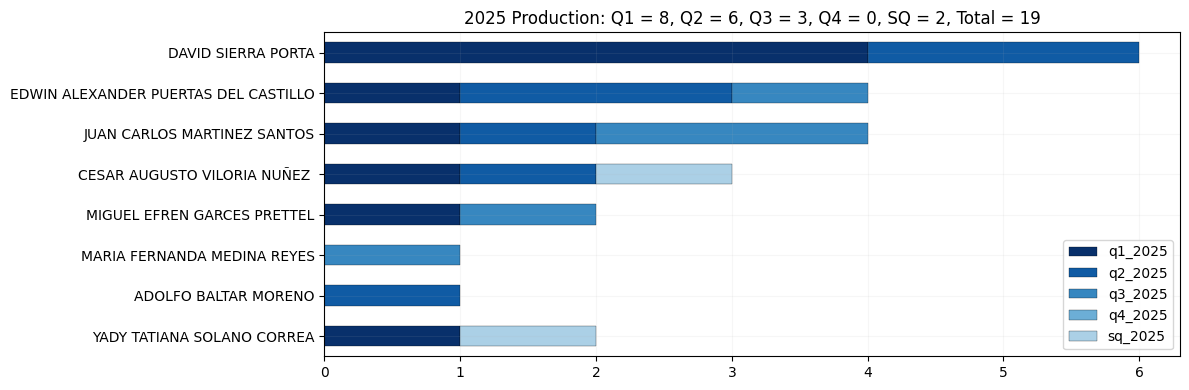

In [ ]:
dat_ETD.set_index("DOCENTE")\
    .sort_values(by="Total 2025",ascending=True)[["q1_2025","q2_2025","q3_2025","q4_2025","sq_2025"]]\
    .plot.barh(stacked=True, figsize=(12, 4), color=colors, edgecolor='k', lw=0.2)
plt.grid(alpha=0.1); plt.ylabel(None)
plt.title("2025 Production: Q1 = {}, Q2 = {}, Q3 = {}, Q4 = {}, SQ = {}, Total = {}".format(
    len(data2[(data2["ESCUELA"]=="ESCUELA DE TRANSFORMACIÓN DIGITAL")&(data2["quartile"]=="Q1")&(data2["year"]==2025)].drop_duplicates(subset="publication")),
          len(data2[(data2["ESCUELA"]=="ESCUELA DE TRANSFORMACIÓN DIGITAL")&(data2["quartile"]=="Q2")&(data2["year"]==2025)].drop_duplicates(subset="publication")),
len(data2[(data2["ESCUELA"]=="ESCUELA DE TRANSFORMACIÓN DIGITAL")&(data2["quartile"]=="Q3")&(data2["year"]==2025)].drop_duplicates(subset="publication")),
len(data2[(data2["ESCUELA"]=="ESCUELA DE TRANSFORMACIÓN DIGITAL")&(data2["quartile"]=="Q4")&(data2["year"]==2025)].drop_duplicates(subset="publication")),
len(data2[(data2["ESCUELA"]=="ESCUELA DE TRANSFORMACIÓN DIGITAL")&((data2["quartile"]=="-")|(data2["quartile"].isna()))&(data2["year"]==2025)].drop_duplicates(subset="publication")),
         len(data2[(data2["ESCUELA"]=="ESCUELA DE TRANSFORMACIÓN DIGITAL")&(data2["year"]==2025)].drop_duplicates(subset="publication"))))
plt.tight_layout()
# plt.savefig("ETD1.png",dpi=300,bbox_inches='tight')